#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

#### Importing and understanding the dataset

In [2]:
#reading the dataset : "Dataframe.csv"
df = pd.read_csv('./Datasets/MSFT.csv') 

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058994,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057340,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058443,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.060097,22752000


In [4]:
#let's get some infromation about the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


#### Data Description : 
Dataset features

- Date : Specific trading Date
- Open : Opening price of the trade for a day
- High : maximum price at particular day
- Low : minimum price at particular day
- Close : Closing price of the trade for a day
- Adj Close :  Adjusted Close 
- Volume : Stock of shares, Total Transactions/total trades, In simple way, Exchange of the shares

##### Type of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


##### finiding about the missing and duplicate values

##### Finding about the missing values

In [6]:
df.isnull().values.any()

False

##### Inshight : False means there are no null values in the dataset 

##### Finding about the duplicates 

In [7]:
df[df.duplicated()]      

,Date,Open,High,Low,Close,Adj Close,Volume


##### Inshight : So by looking at the output we can say there are no duplicates in our dataset.

##### Working with date and time column, it is very important in the data about the datetime that we add month, year, day, hour and other additional information to get better inshights

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df["day_of_week"] = df.Date.dt.dayofweek
df["week"] = df.Date.dt.isocalendar().week
df['day'] = df['Date'].dt.day

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,week,day
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,11,13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,11,14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,12,17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,12,18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,12,19


In [11]:
# Important Note : The ISO definition for week 1 is the week with the first Thursday in it. Using the ISO week number may give unexpected results near the start and end of a year. 
# For instance, in above output 01/01/2021 falls in week 53 of year 2020.

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,week,day
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,11,13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,11,14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,12,17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,12,18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,12,19


##### Calculating the change in percentage that occured since the opening 

In [13]:
df['change'] = df['Close'] - df['Open']
df['change_in_percentage'] =   round( (( (df['Close'] - df['Open'] ) / df['Open'] ) * 100 ), 3)

In [14]:
df.head()
#df.head(1000)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,week,day,change,change_in_percentage
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,11,13,0.008680,9.803
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,11,14,0.003472,3.571
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,12,17,0.001737,1.725
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,12,18,-0.002605,-2.543
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,12,19,-0.001736,-1.739


#### We can add following Technical Indicators features 

- Returns :  A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value.

- Moving Average : Moving Average are used by inverstors and traders to track and identify trends by smoothing Normal Day-to-Day Price Fluctuations 
    - In Addition, It's also used as support for future 
    - Calculated by period of time
    - two types, Simple and Exponential Moving Average
    
- MACD : Moving average convergence divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
    - MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
    - The speed of crossovers is also taken as a signal of a market is overbought or oversold.
    - MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.
    
    


In [15]:
short_period = 12
long_period = 26
signal_period = 9

In [16]:
df['ema_12'] = df['Adj Close'].ewm(span=short_period, adjust=False).mean()
df['ema_26'] = df['Adj Close'].ewm(span=long_period, adjust=False).mean()
df['ema_50'] = df['Adj Close'].ewm(span=50, adjust=False).mean()
df['ema_100'] = df['Adj Close'].ewm(span=100, adjust=False).mean()
df['ema_200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,week,day,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,11,13,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,11,14,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,12,17,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,12,18,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,12,19,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826


In [18]:
ewm_short = df['ema_12']
ewm_long = df['ema_26']
df['MACD'] = ewm_short - ewm_long
df['Signal'] =  df['Adj Close'].ewm(span=signal_period, adjust=False).mean()

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,...,day,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,...,13,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,...,14,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,0.000176,0.062192
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,...,17,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,0.000400,0.062765
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,...,18,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,0.000439,0.062893
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,...,19,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,0.000376,0.062775


In [20]:
df['temp'] = df['Close'].shift(1)

In [21]:
df['Daily Returns'] = (df['temp']/df['Close']) -1
df.drop(['temp'],axis=1,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,...,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Daily Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,...,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,...,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,0.000176,0.062192,-0.034481
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,...,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,0.000400,0.062765,-0.016958
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,...,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,0.000439,0.062893,0.026095
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,...,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,0.000376,0.062775,0.017698


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

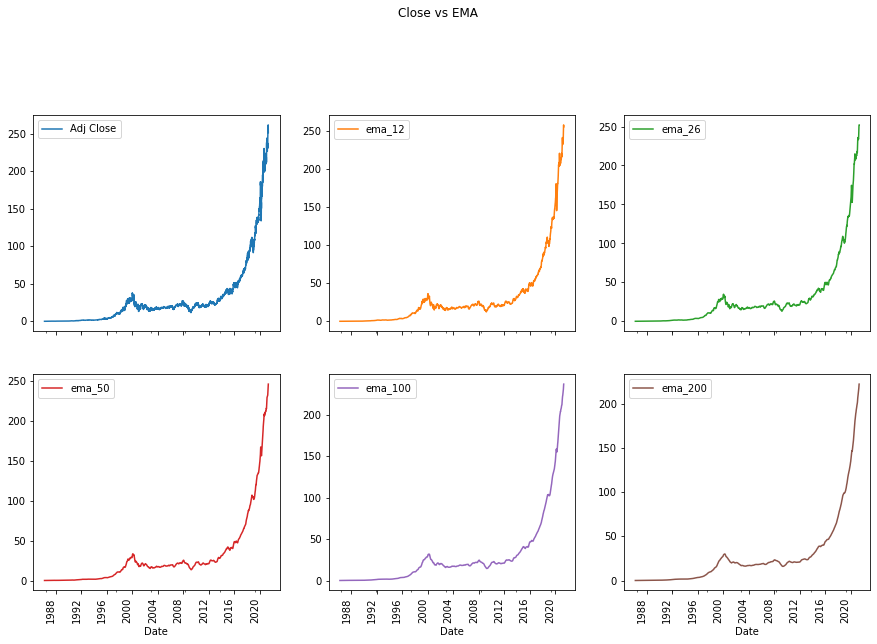

In [22]:
# Plot to view the same
df.plot(x = "Date", y = ['Adj Close', 'ema_12', 'ema_26', 'ema_50', 'ema_100', 'ema_200'] , subplots = True, layout = (3, 3), figsize = (15, 15), title = "Close vs EMA", rot = 90)

No handles with labels found to put in legend.


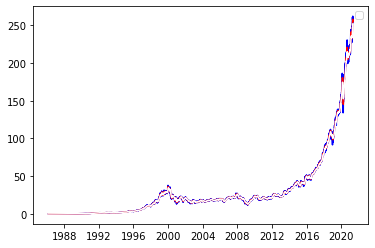

In [23]:
# multiple line plot for adj_close, ema_12 and ema_26
plt.plot( df['Date'] ,  df['Adj Close'] , 'b')
plt.plot( df['Date'], df['ema_12'] , 'r')
plt.plot( df['Date'], df['ema_26'] , 'w')
# show legend
plt.legend()

# show graph
plt.show()